# Visualizing Job Outcomes of College Graduates by Major

## Introduction
In this project, we use data visualizations to explore the employment and earnings potentials of various college majors. We analyze a dataset, originally released by the American Community Survey (ACS) and then cleaned and re-released by FiveThirtyEight, on job outcomes of students who graduated from college between 2010 and 2012. The cleaned dataset, `recent-grads.csv`, can be found on Github here: [data/college-majors](https://github.com/fivethirtyeight/data/tree/master/college-majors), and the full data dictionary is listed below:

- `Rank` -- rank by median earnings (this column orders the dataset);
- `Major_code` -- major code for recorded field of degree (`FOD1P` in ACS PUMS dictionary);
- `Major` -- major description;
- `Major_category` -- category of major, taken from [What’s It Worth?: The Economic Value of College Majors (Carnevale et al, 2011)](https://cew.georgetown.edu/cew-reports/whats-it-worth-the-economic-value-of-college-majors/);
- `Total` -- total number of people with given major;
- `Sample_size` -- unweighted sample size of full-time, year-round students (this column is used to calculate earnings);
- `Men` -- number of male graduates;
- `Women` -- number of female gradutes;
- `ShareWomen` -- ratio of female graduates to total graduates;
- `Employed` -- number of employed graduates;
- `Full_time` -- number of graduates employed 35 hours or more;
- `Part_time` -- number of graduates employed less than 35 hours;
- `Full_time_year_round` -- number of graduates employed at least 50 weeks per year and at least 35 hours per week;
- `Unemployed` -- number of unemployed graduates;
- `Unemployment_rate` -- ratio of unemployed to total graduates;
- `Median` -- median earnings of full-time, year-round workers;
- `P25th` -- 25th percentile of earnings;
- `P75th` -- 75th percentile of earnings;
- `College_jobs` -- number of graduates with job requiring college degree;
- `Non_college_jobs` -- number of graduates with job not requiring college degree;
- `Low_wage_jobs` -- number of graduates in low-wage service jobs.

With this dataset, we investigate some of the trends in demographics and economics of college graduates by major.

## Exploring and cleaning the recent graduates dataset
We begin by exploring the recent graduate data to get familiar with the structure of the dataset, looking quickly at the heading and trailing rows and at the descriptive statistics for each column. We then minimally clean the data, dropping any rows with missing values, to prepare the dataset for use with Matplotlib, which requires all data arrays passed in to be of equal length.

In [1]:
# run Jupyter magin and import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the dataset
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
# print the first row of the dataset
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
# print the first five rows of the dataset
print(recent_grads.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [5]:
# print the last five rows of the dataset
print(recent_grads.tail())

     Rank  Major_code                   Major   Total     Men   Women  \
168   169        3609                 ZOOLOGY  8409.0  3050.0  5359.0   
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0   522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0   568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0   931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0   134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  \
168    Biology & Life Science    0.637293           47      6259   
169  Psychology & Social Work    0.817099            7      2125   
170  Psychology & Social Work    0.799859           13      2101   
171  Psychology & Social Work    0.798746           21      3777   
172                 Education    0.877960            2       742   

         ...        Part_time  Full_time_year_round  Unemployed  \
168      ...             2190                  3602         304   
169      ...      

In [6]:
# generate descriptive statistics for dataset columns
print(recent_grads.describe())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

We see that the columns `Total`, `Men`, `Women`, and `ShareWomen` each contain one less count (172) than the rest of the columns (173), meaning there is at least one row with missing data. We remove the row(s) with missing entries below.

In [7]:
# look up number of rows
raw_data_count = recent_grads.shape[0]
print(raw_data_count)

173


In [8]:
# drop rows containing missing values
recent_grads = recent_grads.dropna()

In [9]:
# look up number of rows after dropping those with missing values
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)

172


As we can see above by comparing the number of rows before and after cleaning, only one row contained missing values and was dropped.

## Scatter Plots
Next, we produce several scatter plots comparing variables of the recent graduate dataset to investigate the relationships between them.

(-100, 3000)

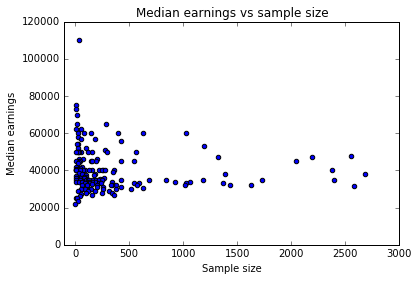

In [33]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter',
                  title='Median earnings vs sample size')
ax1.set_xlabel('Sample size')
ax1.set_ylabel('Median earnings')
ax1.set_xlim(-100,3000)

(-100, 3000)

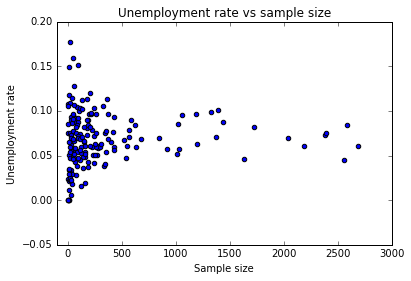

In [44]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                        kind='scatter', 
                        title='Unemployment rate vs sample size')
ax2.set_xlabel('Sample size')
ax2.set_ylabel('Unemployment rate')
ax2.set_xlim(-100,3000)

(-5000, 200000)

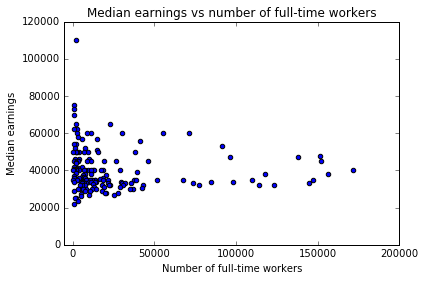

In [37]:
ax3 = recent_grads.plot(x='Full_time', y = 'Median', kind='scatter',
                        title='Median earnings vs number of full-time workers')
ax3.set_xlabel('Number of full-time workers')
ax3.set_ylabel('Median earnings')
ax3.set_xlim(-5000,200000)

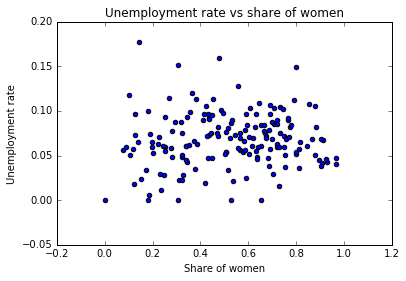

In [36]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                        kind='scatter', title='Unemployment rate vs share of women')
ax4.set_xlabel('Share of women')
ax4.set_ylabel('Unemployment rate')

(-5000, 150000)

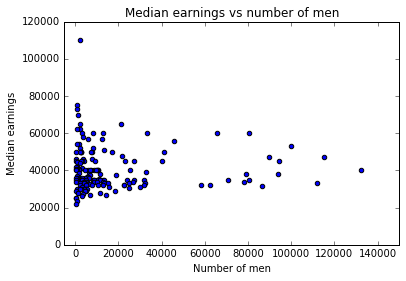

In [40]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter',
                        title='Median earnings vs number of men')
ax5.set_xlabel('Number of men')
ax5.set_ylabel('Median earnings')
ax5.set_xlim(-5000,150000)

(-5000, 200000)

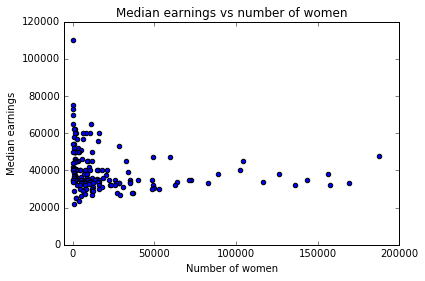

In [42]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter',
                        title='Median earnings vs number of women')
ax6.set_xlabel('Number of women')
ax6.set_ylabel('Median earnings')
ax6.set_xlim(-5000,200000)

It's difficult to glean much meaningful information from the above scatter plots. If anything, the relationships between the two variables in each plot appear rather linear, with no noticeable dependence of the amount of money earned on the popularity of major, the fraction of women in the major, or the number of full-time employees.

## Histograms
We then explore the distributions of several individual dataset variables through the use of histograms. Histograms allow us to easily visualize how the frequencies of values are distributed. A nubmer of examples produced from the recent graduates dataset are illustrated below.

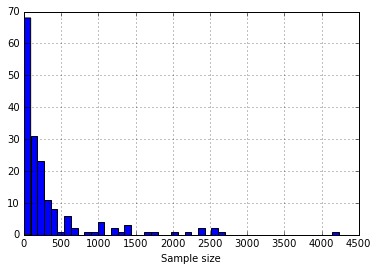

In [115]:
hist1 = recent_grads['Sample_size'].hist(bins=50, range=(0,4500))
hist1.set_xlabel('Sample size')

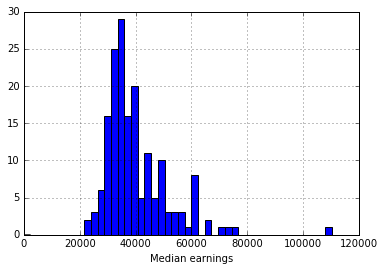

In [119]:
hist2 = recent_grads['Median'].hist(bins=50, range=(0,120000))
hist2.set_xlabel('Median earnings')

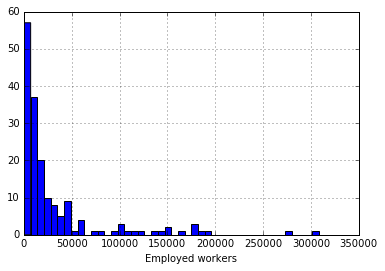

In [118]:
hist3 = recent_grads['Employed'].hist(bins=50, range=(0,350000))
hist3.set_xlabel('Employed workers')

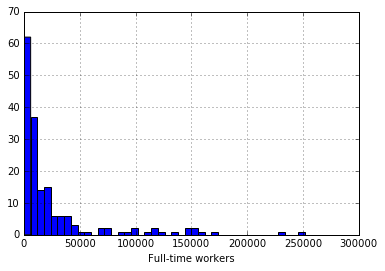

In [120]:
hist4 = recent_grads['Full_time'].hist(bins=50, range=(0,300000))
hist4.set_xlabel('Full-time workers')

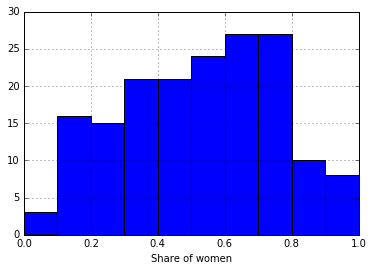

In [121]:
hist5 = recent_grads['ShareWomen'].hist(bins=10, range=(0,1))
hist5.set_xlabel('Share of women')

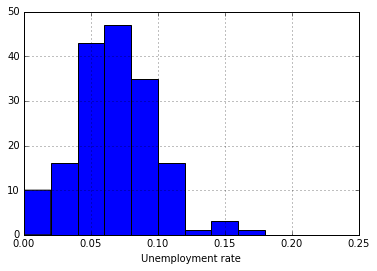

In [122]:
hist6 = recent_grads['Unemployment_rate'].hist(bins=10, range=(0,0.2))
hist6.set_xlabel('Unemployment rate')

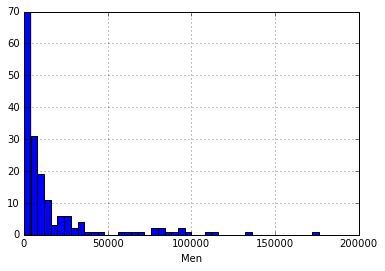

In [123]:
hist7 = recent_grads['Men'].hist(bins=50, range=(0,200000))
hist7.set_xlabel('Men')

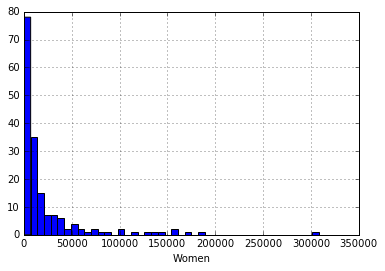

In [124]:
hist8 = recent_grads['Women'].hist(bins=50, range=(0,350000))
hist8.set_xlabel('Women')

## Scatter matrix plots
We can also combine scatter plots and histograms together into n by n scatter matrix plots, which illustrate one-dimensional histograms on the diagonal and two-dimensional scatter plots on the off-diagonal, where n is the number of variables being plotted.

In [125]:
# import scatter_matrix function
from pandas.plotting import scatter_matrix

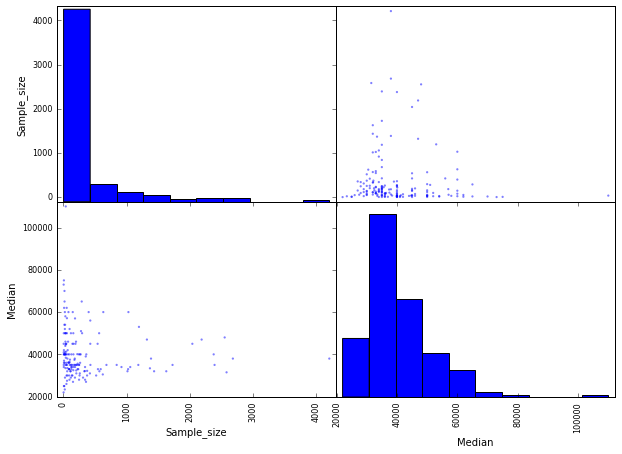

In [130]:
scatmat_2x2 = scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,7))

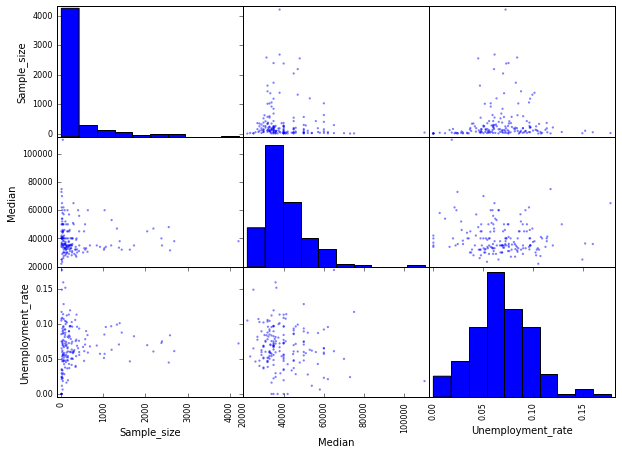

In [133]:
scatmat_3x3 = scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,7))

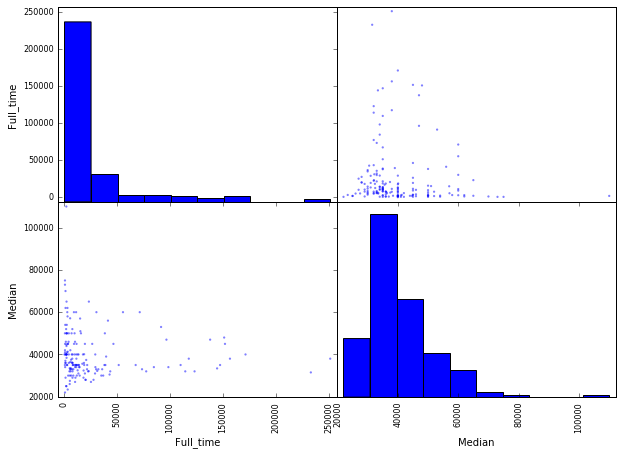

In [134]:
scatmat_2x2 = scatter_matrix(recent_grads[['Full_time', 'Median']], figsize=(10,7))

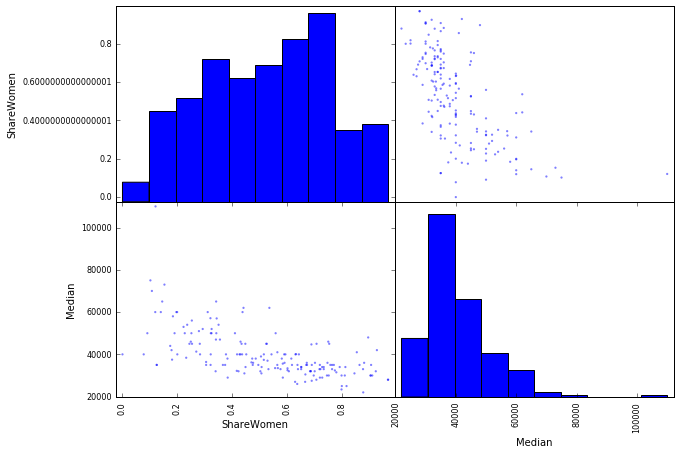

In [135]:
scatmat_2x2 = scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(10,7))

From the above scatter matrix plots, we verify there is no significant dependence of the median earnings on the sample size or the number of full-time employees, as we already determined from our initial scatter plots. However, we can now more clearly see a correlation between the share of women and the median earnings from the ShareWomen vs. Median scatter matrix plot above. Students that majored in subjects that were majority female tend to make less money on average, as evidenced from the downward trend of the median earnings as a function of the share of women.

## Bar Plots
Finally, we produce a few bar plots below to compare the fraction of women and the unemployment rate per major between the beginning and the end of the dataset. Since the dataset is ordered by median earnings, the majors at the top of the dataset are those with the highest earning potential, and the majors at the bottom of the dataset are those with the lowest median earnings.

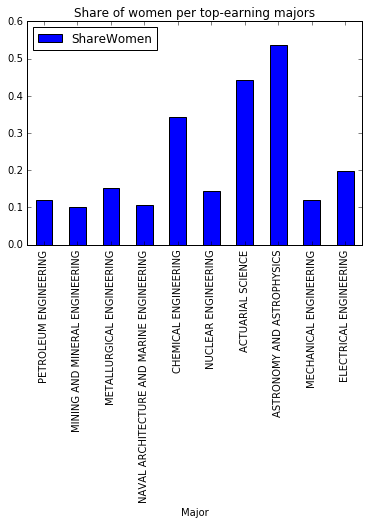

In [146]:
bar1 = recent_grads[:10].plot.bar(x='Major',y='ShareWomen', color='blue')
bar1.set_title('Share of women per top-earning majors')

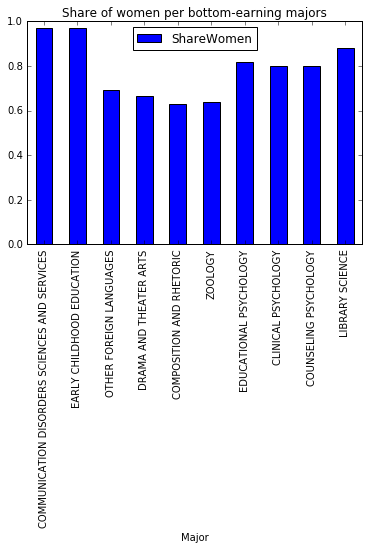

In [147]:
bar2 = recent_grads[-10:].plot.bar(x='Major',y='ShareWomen', color='blue')
bar2.set_title('Share of women per bottom-earning majors')

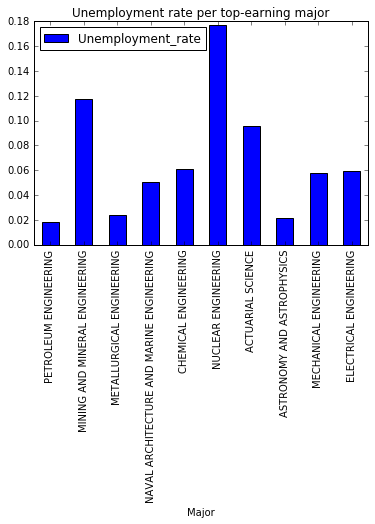

In [148]:
bar3 = recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate', color='blue')
bar3.set_title('Unemployment rate per top-earning major')

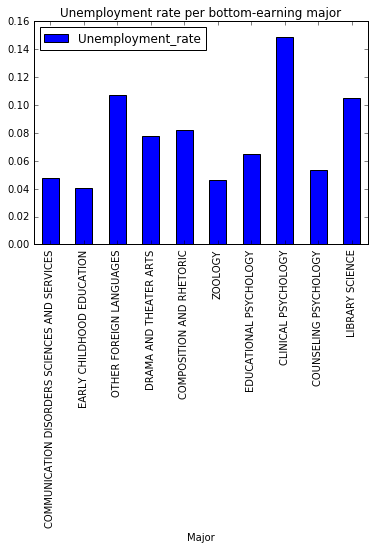

In [150]:
bar4 = recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate', color='blue')
bar4.set_title('Unemployment rate per bottom-earning major')

We notice that most of the top-earning majors are dominated by men, while all of the ten majors with the least earning potential are dominated by females. On the other hand, the unemployment rate is more widely spread across all majors, regardless of their median earnings.

## Conclusion
In this project, we explored a dataset of college major job outcomes and earnings through visualization using a series of plotting tools built into pandas. We found that the median earnings of each major is independent of the popularity of the major but that female-dominated majors tend to make less money on average.